Loaded data/results/matching/rook_match_sim2/img_044.exr
Loaded data/results/matching/rook_match_sim2/img_042.exr
Loaded data/results/matching/rook_match_sim2/img_040.exr
Loaded data/results/matching/rook_match_sim2/img_038.exr
Loaded data/results/matching/rook_match_sim2/img_036.exr
Loaded data/results/matching/rook_match_sim2/img_034.exr
Loaded data/results/matching/rook_match_sim2/img_032.exr
Loaded data/results/matching/rook_match_sim2/img_030.exr
Loaded data/results/matching/rook_match_sim2/img_028.exr
Loaded data/results/matching/rook_match_sim2/img_026.exr
Loaded data/results/matching/rook_match_sim2/img_024.exr
Loaded data/results/matching/rook_match_sim2/img_022.exr
Loaded data/results/matching/rook_match_sim2/img_020.exr
Loaded data/results/matching/rook_match_sim2/img_018.exr
Loaded data/results/matching/rook_match_sim2/img_016.exr
Loaded data/results/matching/rook_match_sim2/img_014.exr
Loaded data/results/matching/rook_match_sim2/img_012.exr
Loaded data/results/matching/ro

(array([[ -34.86630407, -116.78064957,  831.30384146],
        [ -34.73393142, -116.71587598,  830.84275025],
        [ -34.63196029, -116.75317069,  831.10823286],
        ...,
        [  -9.28499848,   69.75004673,  790.93511816],
        [  -9.17138549,   69.70438004,  790.41727774],
        [  -9.06589649,   69.72010629,  790.59560661]]),
 array([[ -34.86630407, -116.78064957,  831.30384146],
        [ -34.73393142, -116.71587598,  830.84275025],
        [ -34.63196029, -116.75317069,  831.10823286],
        ...,
        [  -9.28499848,   69.75004673,  790.93511816],
        [  -9.17138549,   69.70438004,  790.41727774],
        [  -9.06589649,   69.72010629,  790.59560661]]))

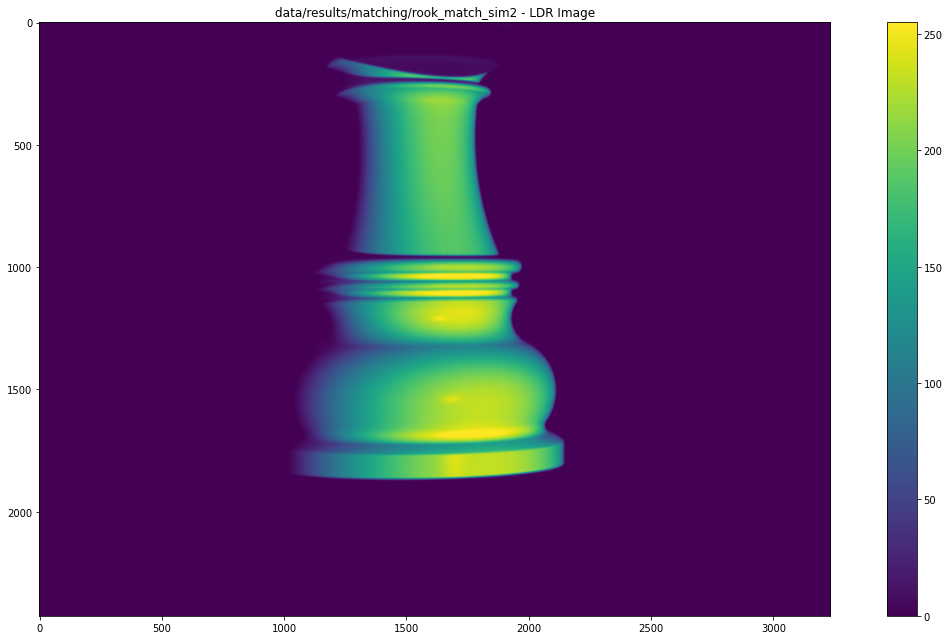

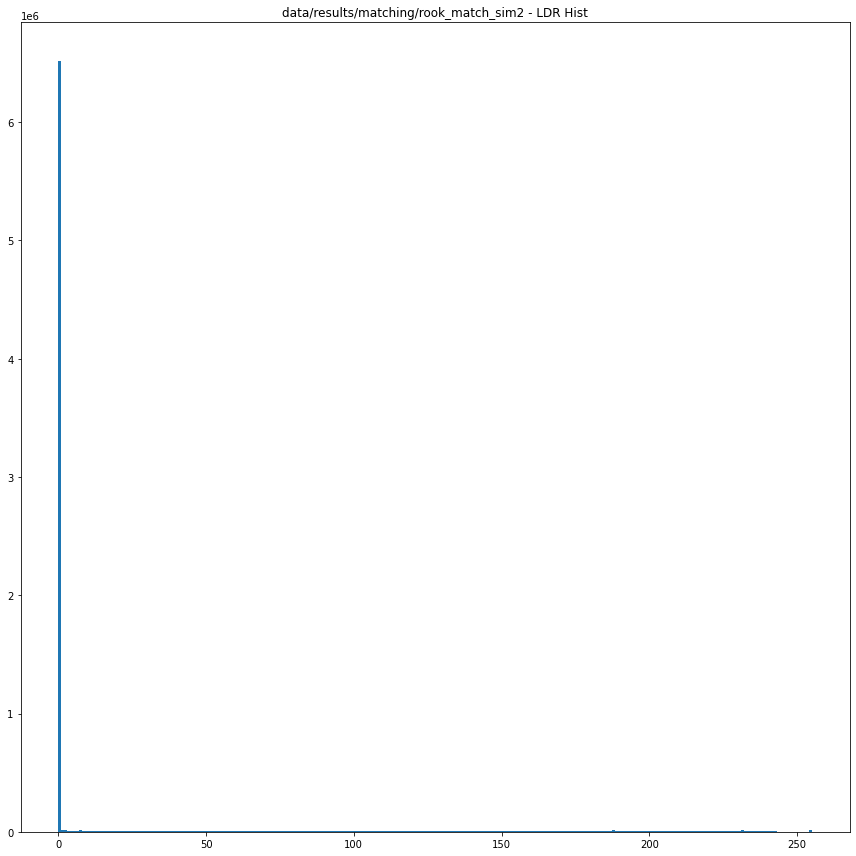

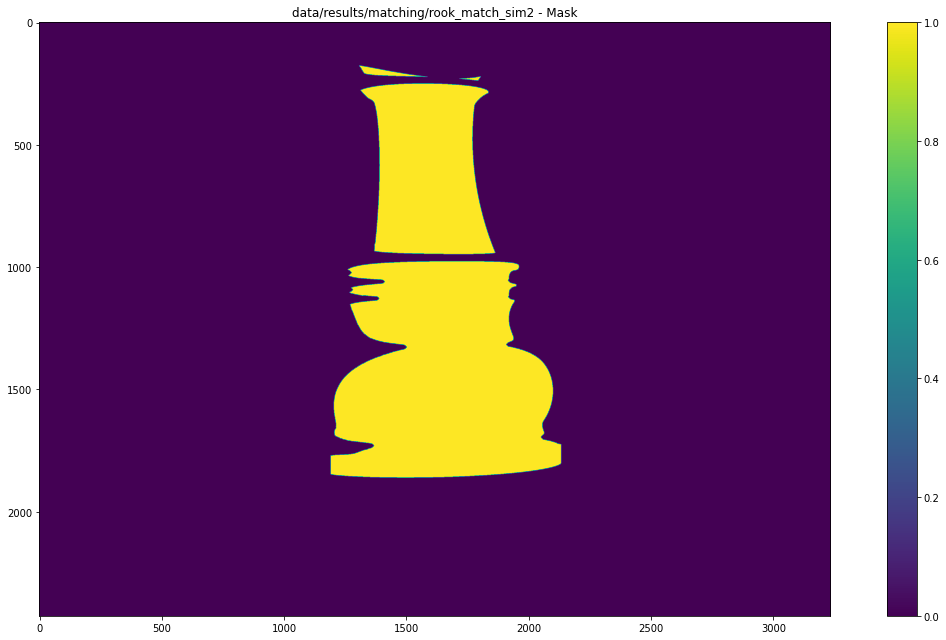

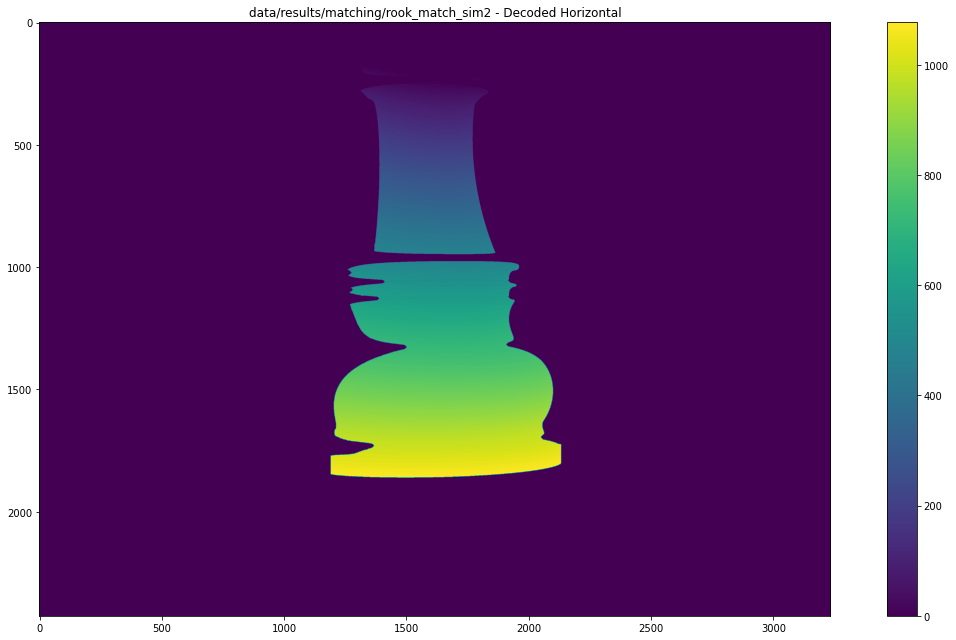

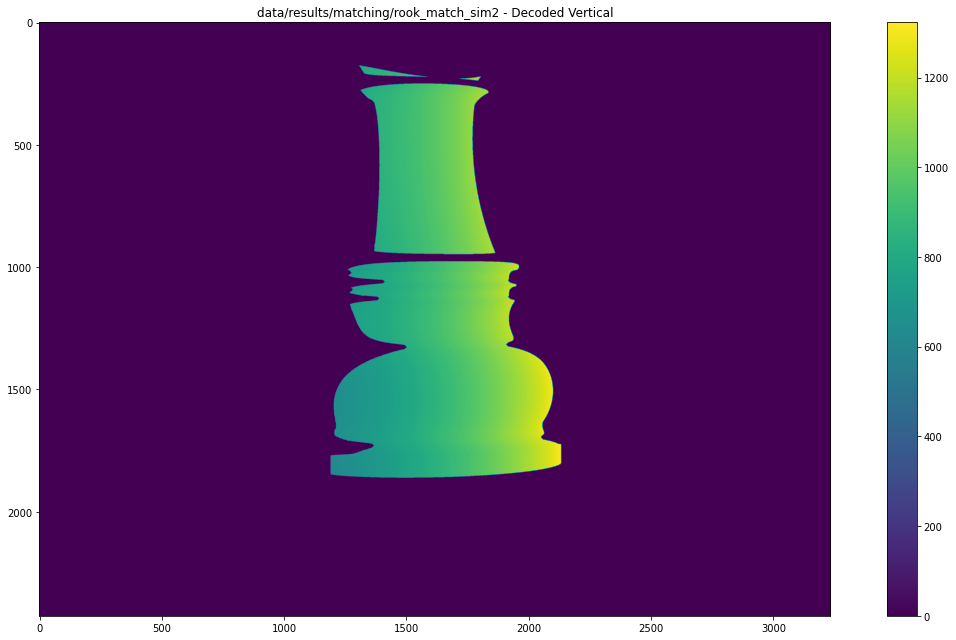

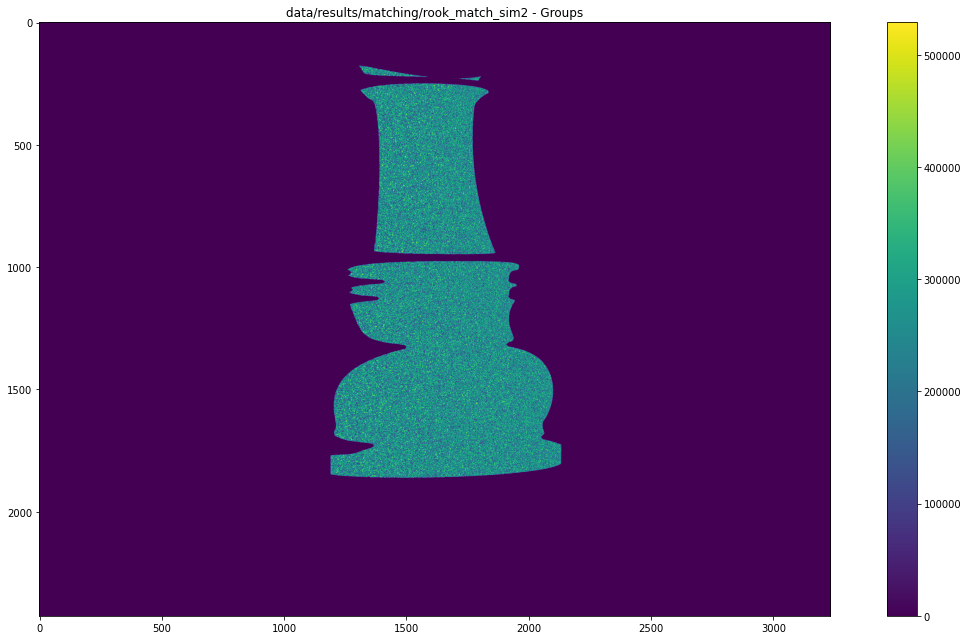

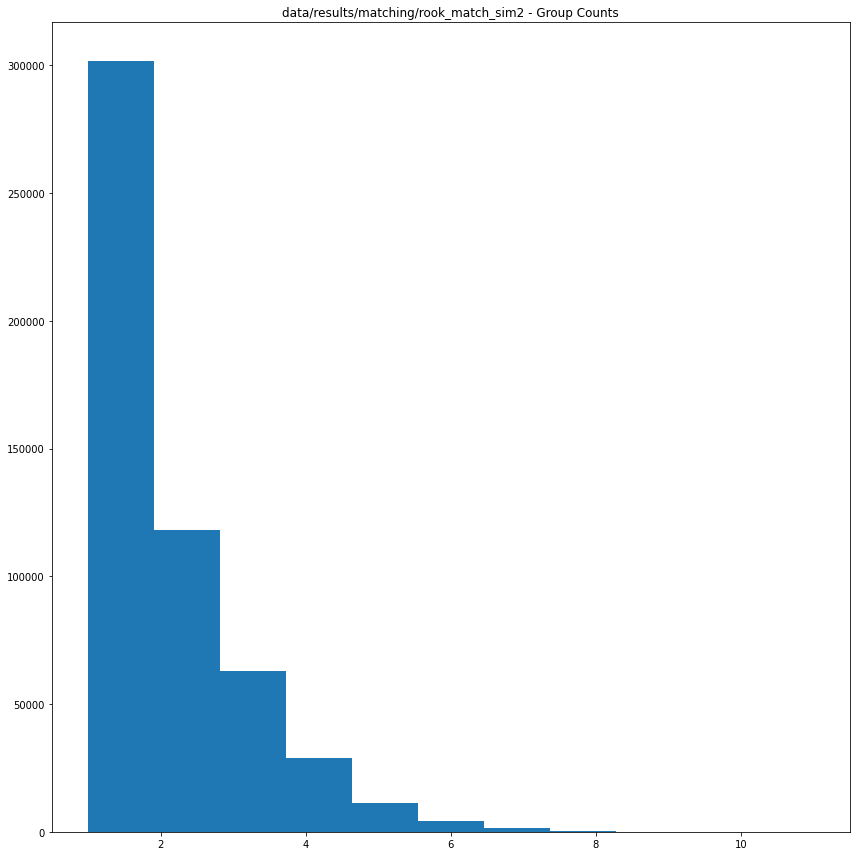

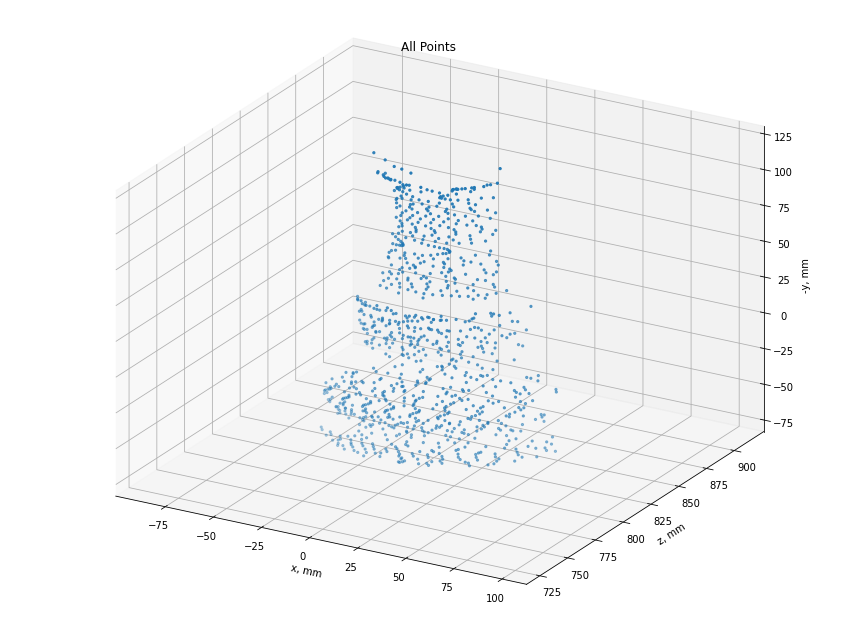

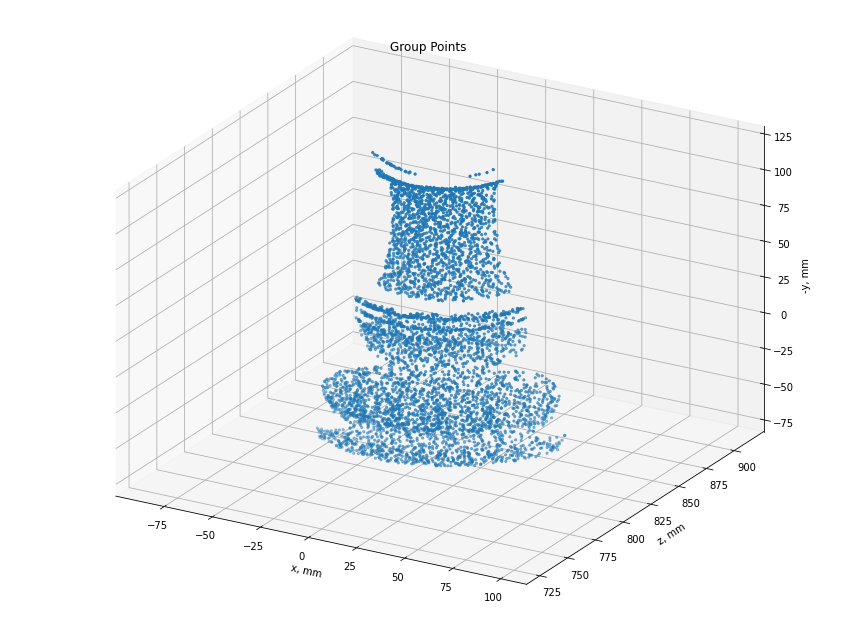

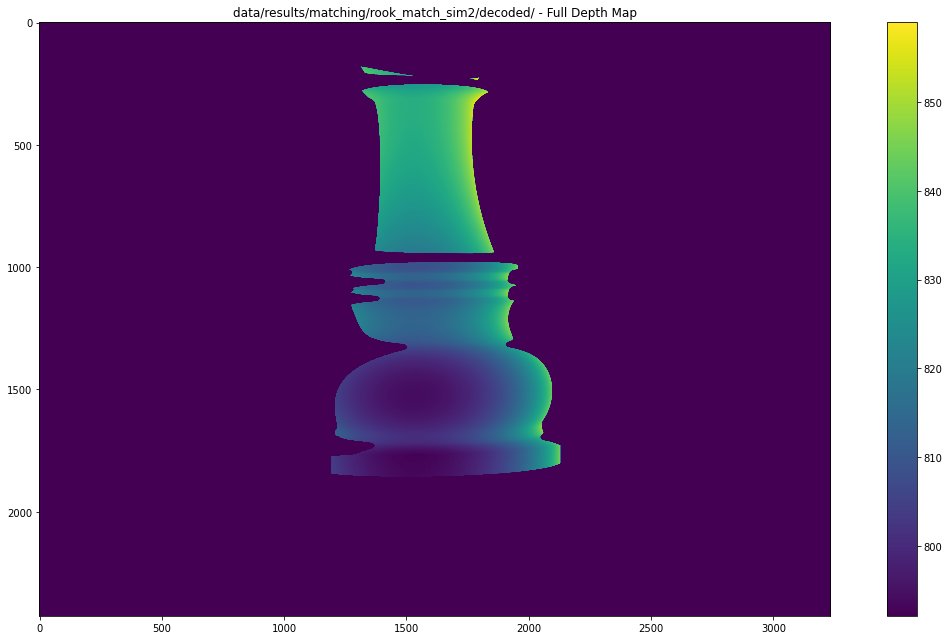

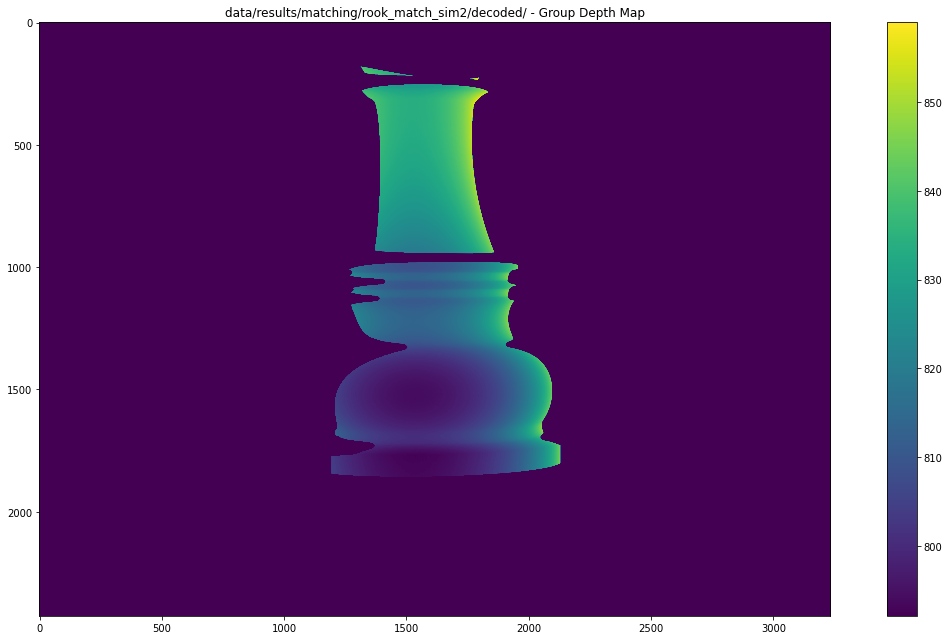

In [1]:
# Decoding + Reconstruction
import glob
import os
import json
import numpy as np
os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")

from scanner.capture.decode import decode_single
from scanner.capture.reconstruct import reconstruct_single

def load_camera_calibration(filename):
    with open(filename, "r") as f:
        return numpinize(json.load(f))
    
def load_projector_calibration(filename):
    with open(filename, "r") as f:
        calib = numpinize(json.load(f))

    intrinsic = calib["mtx"], calib["dist"], calib["new_mtx"], calib["roi"]
    extrinsic = calib["origin"], calib["basis"]

    return intrinsic, extrinsic, calib
    
def numpinize(data):
    return {k: (np.array(v) if (type(v) is list or type(v) is tuple) else
               (numpinize(v) if type(v) is dict else v)) for k, v in data.items()}

pro_calib = load_projector_calibration("scanner/calibration/projector/projector_calibration.json")[2]

data_path = "data/results/matching/rook_match_sim2"
sim = True
undistort = None
cam_calib = load_camera_calibration("scanner/calibration/camera/camera_calibration_m.json")


# data_path = "data/results/matching/shapes_match_scan"
# sim = False
# undistort = cam_calib
# cam_calib = load_camera_calibration("scanner/calibration/camera/camera_calibration.json")

pr, pc, img2 = decode_single(data_path, undistort=undistort, symmetric=True, group=True, plot=True, verbose=True, sim=sim)
#decode_many(data_path_template % object, undistort=camera_calib, symmetric=True, crop=1500, group=True, plot=True, verbose=True)

reconstruct_single(data_path, cam_calib, pro_calib, max_group=25, plot=True, verbose=True)

(2426, 3232) (4852, 6464) int64 int64
(2426, 3232)
(2426, 3232)


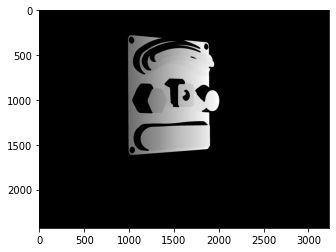

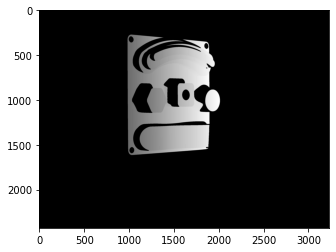

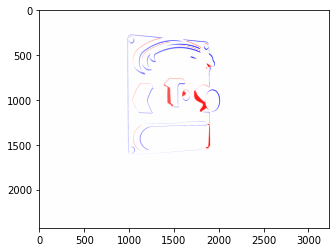

0.24807339449541288 0.7480733944954128


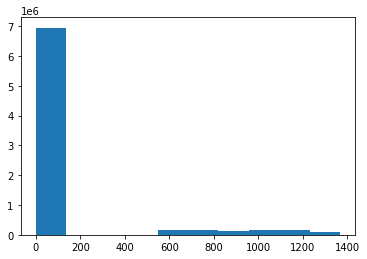

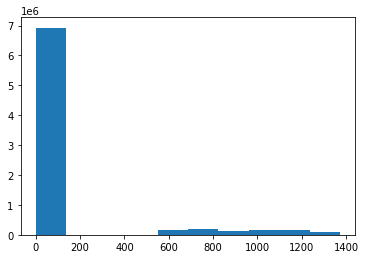

In [36]:
import matplotlib.pyplot as plt
import cv2
import matplotlib
print(img.shape, img2.shape, img.dtype, img2.dtype)
#img = img[:, :-2]
print(img.shape)
img3 = img2[::2,::2]
print(img3.shape)

plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(img3, cmap="gray")
plt.show()

matplotlib.image.imsave('data/results/matching/sim_h_indices.png', img, vmin=400, vmax=1500, cmap="gray")
matplotlib.image.imsave('data/results/matching/sscan_h_indices.png', img3, vmin=400, vmax=1500, cmap="gray")


mmax = max(np.max(img), np.max(img3))
diff = img - img3
diff2 = img/mmax - img3/mmax
dist = np.max(diff2) - np.min(diff2)
diff2 = 0.5/dist * diff2 + 0.5
plt.imshow(diff2, cmap="bwr")
plt.show()
print(np.min(diff2), np.max(diff2))
matplotlib.image.imsave('data/results/matching/sscan_differences.png', diff2, cmap="bwr")
#img3 = cv2.resize(img2, dsize=(img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
#-1373 1352

plt.hist(img.reshape(-1))
plt.show()
plt.hist(img3.reshape(-1))
plt.show()

In [ ]:
import cv2


0.0 0.8549201 0.0 0.87143 0.0 1.0381583


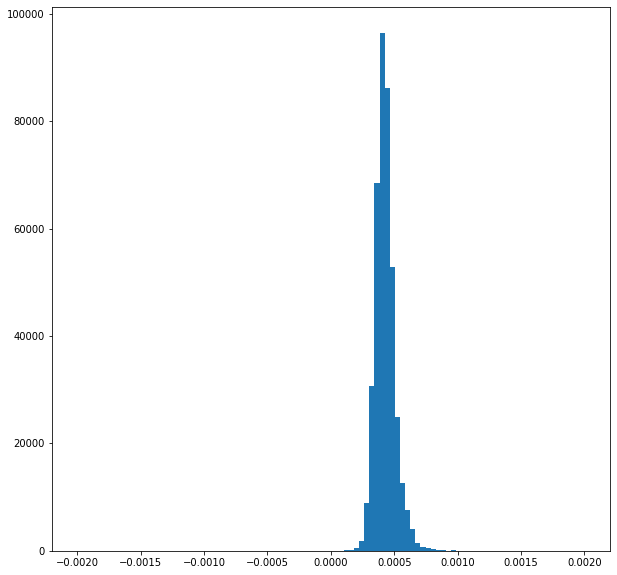

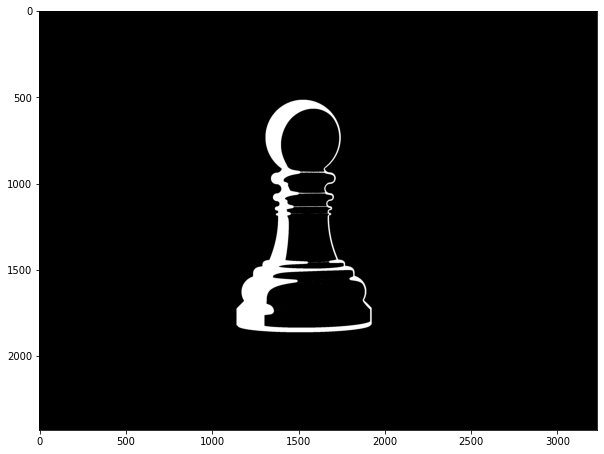

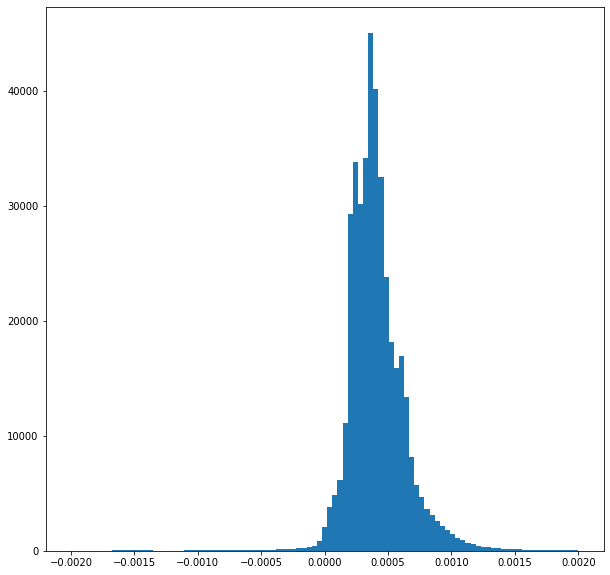

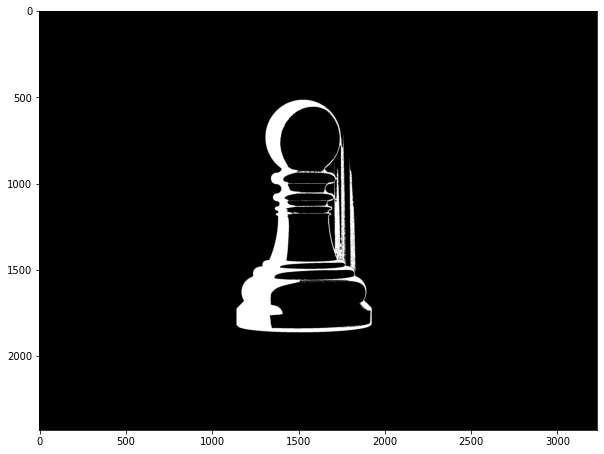

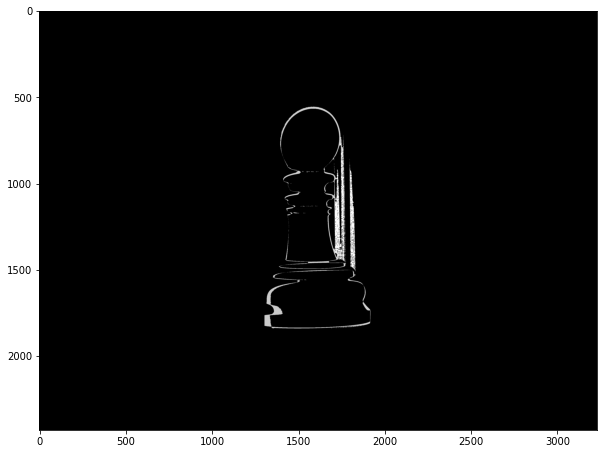

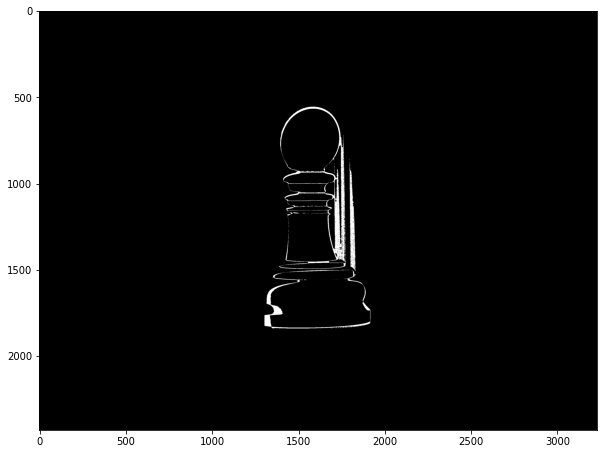

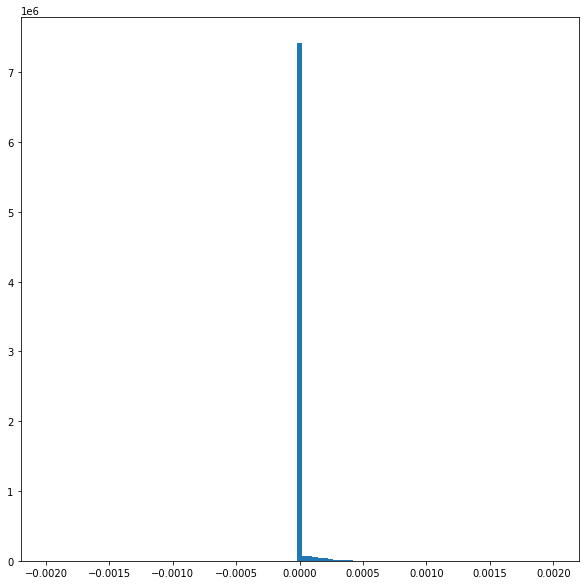

In [39]:
import numpy as np
import os
import cv2
import numpy as np

os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")

def read_numpy(path):
    with open(path, "rb") as fi:
        return np.load(fi)

def save_numpy(path, m):
    with open(path, "wb") as fi:
        np.save(fi, m)
        
name = "pawn"
    
dm_scan = read_numpy("data/results/%s_match_scan/reconstructed/group_depth_map.npy"%name) / 1000.0
#print(dm_scan.shape)
dm_gt = read_numpy("data/results/%s_match_sim/decoded/depth_gt.npy"%name)
dm_sim = read_numpy("data/results/%s_match_sim/reconstructed/group_depth_map.npy"%name) / 1000.0
dm_gt = dm_gt[:, :-2]
dm_sim = dm_sim[:, :-2]



dm_scan = cv2.resize(dm_scan, dsize=(dm_gt.shape[1], dm_gt.shape[0]), interpolation=cv2.INTER_AREA)



#print(dm_scan.shape, dm_gt.shape, dm_sim.shape)
print(np.min(dm_sim), np.max(dm_sim), np.min(dm_gt), np.max(dm_gt), np.min(dm_scan), np.max(dm_scan))

compare_rec_and_gt(dm_sim, dm_gt, plot_level=1, mean_shift=False)
compare_rec_and_gt(dm_scan, dm_gt, plot_level=1, mean_shift=False);

diff = np.abs(dm_scan-dm_sim)
difft = diff.copy()
difft[difft > 0.001] = 1.0
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap="gray")
plt.show()
plt.figure(figsize = (10,10))
plt.imshow(difft, cmap="gray")
plt.show()

#diff = dm_scan[mask - rec[mask==1]
plt.figure(figsize = (10,10))
plt.hist(diff.reshape(-1), np.linspace(-0.002, 0.002, 100))
plt.show()

save_numpy("data/results/%s_match_sim/compare/dm_gt.npy"%name, dm_gt)
save_numpy("data/results/%s_match_sim/compare/dm_sim.npy"%name, dm_sim)
save_numpy("data/results/%s_match_sim/compare/dm_scan.npy"%name, dm_scan)

In [ ]:
# Decoding + Reconstruction + Ground Truth Extraction

import glob
import os

os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")


from reconstruction.reconstruct import reconstruct_object
from decoding.decode import decode_images_gray
from tqdm.auto import tqdm
from shutil import copyfile
import yaml
import igl
import numpy as np



def batch_prepare_files_in_folders(path, stages=[True, True, True, True]):
    folders = sorted(os.listdir(path))

    for folder in tqdm(folders[:1]):
        if stages[0]:
            if os.path.isfile("%s/%s/img_amb.png"%(path, folder)):
                os.rename("%s/%s/img_amb.png"%(path, folder), "%s/%s/amb.png"%(path, folder))
            decode_images_gray("%s/%s"%(path, folder), prefix="img_", pro=[2191, 2191])
        if stages[1]:
            reconstruct_object("%s/%s"%(path, folder), "data/calibrations/calibration_new_sim.yml", pro=[2191, 2191], threshold=150, prefix="img")
        if stages[2]:
            dm_rec = convert_depthmap_rec("%s/%s"%(path, folder), "depth_rec.txt", cam=[3232, 2426])
            dm_gt = convert_depthmap_gt("%s/%s"%(path, folder), "img_000.exr")
        if stages[3]:
            dm_rec, dm_gt, pc_gt = compare_rec_and_gt(dm_rec, dm_gt, plot_level=2, mean_shift=False)
            save_rec_and_gt(dm_rec, dm_gt, "%s/%s"%(path, folder))
            print(pc_gt.shape, np.min(pc_gt), np.max(pc_gt))
            #v, _ = igl.read_triangle_mesh("%s/%s/pointcloud_rec.ply"%(path, folder))
            #print(np.min(v), np.max(v))
            pc_gt *= 1000.0
            igl.write_triangle_mesh("%s/%s/pointcloud_gt.ply"%(path, folder), pc_gt, np.array([[1, 2, 0]]))
            
            
def unproject(depth, K, R=np.eye(3), t=np.zeros(3), depth_is_distance=True):
    """ Unproject a depth map into 3d space
   Args:
        depth (tensor): depth map of size H x W (x 1)
        K (tensor): intrinsic matrix of size 3 x 3
        R (tensor): rotation matrix of size 3 x 3
        t (tensor): translation of size 3 (x 1)
        depth_is_distance (bool): indicator whether the depth is the distance from the camera origin 
                                  or the Z coordinate in camera coordinates
    """
    K_inv = np.linalg.inv(K)
    if len(t.shape) == 1:
        t = t[:, np.newaxis]
    height, width = depth.shape[:2]
    xs = np.arange(width)
    ys = np.arange(height)
    pixels = np.stack(np.meshgrid(xs, ys) + [np.ones((height, width))], axis=-1).astype(np.float32)
    # Unproject the pixel x in homogeneous coordinates
    # according to the equation X = R^t (K^(-1) * Z * x - t)
    pixels = pixels.reshape(-1, 3).transpose() # From H x W x 3 to 3 x N
    depth = depth.reshape(-1, 1).transpose()   # From H x W (x 1) to 1 x N
    points = K_inv @ pixels
    if depth_is_distance:
        # "Depth" is not the Z coordinate of the points but the euclidean distance from the camera origin
        points /= np.linalg.norm(points, axis=0)
    points = (R.transpose() @ (depth * points - t))
    points = points.transpose().reshape(height, width, 3)   # From 3 x N to H x W x 3
    return points

def prepare_dataset_from_folders(path, ds_path, white_name="cam_01.png", amb_name="*amb*.png", rec_name="depth_rec.npy", gt_name="depth_gt.npy", pc_name="pointcloud_rec.ply"):
    os.makedirs(ds_path, exist_ok=True)
    
    folders = sorted(os.listdir(path))
    mapping = {}
    cnt = 0
    for folder in tqdm(folders[:]):
        ambient = glob.glob("%s/%s/%s"%(path, folder, amb_name))[0]
        white = glob.glob("%s/%s/%s"%(path, folder, white_name))[0]
        depth_gt = glob.glob("%s/%s/%s"%(path, folder, gt_name))[0]
        depth_rec = glob.glob("%s/%s/%s"%(path, folder, rec_name))[0]
        pc = glob.glob("%s/%s/%s"%(path, folder, pc_name))[0]
        
        #print(ambient, white, depth_gt, depth_rec, pc)
        
        mapping[cnt] = folder
        ambient_r = "%s/%04i_cam_a.png"%(ds_path, cnt)
        white_r = "%s/%04i_cam_w.png"%(ds_path, cnt)
        depth_gr = "%s/%04i_depth_gt.npy"%(ds_path, cnt)
        depth_rr = "%s/%04i_depth_rec.npy"%(ds_path, cnt)
        pc_r = "%s/%04i_pc.ply"%(ds_path, cnt)

        copyfile(ambient, ambient_r)
        copyfile(white, white_r)
        copyfile(depth_gt, depth_gr)
        copyfile(depth_rec, depth_rr)
        copyfile(pc, pc_r)
        
        cnt += 1
        
    with open("%s/mapping.yml"%ds_path, "w") as fi:
        yaml.dump(mapping, fi)

        
        
batch_prepare_files_in_folders("data/results/shapes_match")
#prepare_dataset_from_folders("data/results/_abc", "rendering/datasets/abc_250")

In [36]:
import igl
import os
os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")

import meshplot as mp
from scipy.spatial.transform import Rotation as R
import numpy as np



# Random rotated shapes
# v_ref, f_ref = igl.read_triangle_mesh("data/objects/machined/shapes_c.ply")
# v_rec, _ = igl.read_triangle_mesh("data/results/shapes_scan/rot_000/pointcloud_gt.ply")
# r = np.array([[1.0, 0.0, 0.0],
#               [0.0, -1.0, 0.0],
#               [0, 0.0, -1.0]])
# t = np.array([[0.0, -0.02, 0.858, 1.0]])
# a = [-11, 9, -21]

# Shapes Match
v_ref, f_ref = igl.read_triangle_mesh("data/objects/machined/pawn.obj")
v_rec, _ = igl.read_triangle_mesh("data/results/pawn_match_sim/pawn_group.ply")

#shapes
r = np.array([[0.00473251, 0.99973483, 0.02252548],
                     [0.70316257, -0.0193432,   0.71076595],
                     [0.71150094,  0.01246195, -0.70257463]])
t = np.array([[-.07613365619, -0.10450656288, 0.81651577885, 1.0]])

#rook
t = np.array([[-.00965021966, .07090294057, 0.86141378352, 1.0]])
r = np.array([[ 9.99985088e-01, -5.46014155e-03, -1.06692981e-04],
             [ 0.00000000e+00, -1.95366030e-02,  9.99809142e-01],
             [-5.46118386e-03, -9.99794233e-01, -1.95363117e-02]])

#pawn
r = np.array([[9.99985088e-01, -5.46014155e-03, -1.06692981e-04],
              [0.00000000e+00, -1.95366030e-02,  9.99809142e-01],
              [-5.46118386e-03, -9.99794233e-01, -1.95363117e-02]])
t = np.array([[-.00948753506, .07090617493, 0.86120278452, 1.0]])

a = [0, 0, 0]

def transform_vertices(verts, angles, rotation, translation, scale=1000.0):
    r = R.from_euler("xyz", np.array(angles), degrees=True) #angle rotation
    r2 = R.from_matrix(rotation) #object pose
    r = (r2*r).as_matrix() #combined rotation

    r = np.vstack([r.T, np.zeros(3)])
    t = translation * scale
    trans = np.hstack([r, t.T]) #combined rot+trans

    pad = np.ones((verts.shape[0], 1))
    verts_h = np.hstack([verts, np.ones((verts.shape[0], 1))]) # homogeneous
    v_trans = np.dot(trans, verts_h.T).T # transformed
    
    return v_trans[:, :3]
    
    
v_ref = transform_vertices(v_ref, angles = a, rotation=r, translation = t)

p = mp.plot(v_ref, f_ref, return_plot=True)
v_rec_ss = v_rec[np.random.choice(v_rec.shape[0], 100000, replace=False), :]
v_rec_sm = v_rec[np.random.choice(v_rec.shape[0], 500000, replace=False), :]

p.add_points(v_rec_ss, shading={"point_size": 2.0})

igl.write_triangle_mesh("data/results/pawn_match_sim/compare/reference_mesh.obj", v_ref, f_ref)
igl.write_triangle_mesh("data/results/pawn_match_sim/compare/reconstructed_s.obj", v_rec_ss, np.array([[1, 0, 2]]))
igl.write_triangle_mesh("data/results/pawn_match_sim/compare/reconstructed_m.obj", v_rec_sm, np.array([[1, 0, 2]]))



#igl.write_triangle_mesh("data/results/shapes_scan/rot_000/reference.obj", v_ref, f_ref)


#igl.write_triangle_mesh("reconstructed.obj", v_rec_ss, np.array([[0, 1, 2]]))
#v_rec_ss = v_rec[np.random.choice(v_rec.shape[0], 340670, replace=False), :]


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

True

In [19]:
import OpenEXR, Imath
import numpy as np
import matplotlib.pyplot as plt

def convert_depthmap_rec(path, dm_name, cam=[2048, 2048]):
    dmap_file = "%s/%s"%(path, dm_name)

    with open(dmap_file, "r") as fi:
        lines = fi.readlines()

    dmap = np.zeros((cam[1], cam[0]), dtype="float32")
    for i, l in enumerate(lines):
        el = l.strip().split("\t")
        for j, e in enumerate(el):
            dmap[i, j] = float(e) * 0.001
            
    return dmap

def convert_depthmap_gt(path, gt_name):
    exrfile = "%s/%s"%(path, gt_name)
    imagefile = OpenEXR.InputFile(exrfile)
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    header = imagefile.header()
    dw = header['dataWindow']
    channels = header['channels']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1, len(channels))
    depth = imagefile.channel("distance.Y", pt)
    im = np.frombuffer(depth, dtype=np.float32)
    im.shape = (size[1], size[0])
    im = im.reshape(size[1], size[0])
    im = im[:, :3232]
    
    return im
        
        
def compare_rec_and_gt(rec, gt, plot_level=0, mean_shift=True):
    if plot_level >= 2:
        plt.figure(figsize = (10,10))
        plt.imshow(rec)
        plt.show()
        plt.figure(figsize = (10,10))
        plt.imshow(gt)
        plt.show()

    mask = np.zeros_like(rec)
    mask[rec>0] = 1

    mask2 = np.zeros_like(gt)
    mask2[gt>0] = 1
    
    if plot_level >= 2:
        rec_med = np.median(rec[mask == 1])
        gt_med = np.median(gt[mask == 1])
        print("Rec_median: %f, Gt_median: %f"%(rec_med, gt_med))

        plt.figure(figsize = (10,10))
        plt.imshow(mask)
        plt.show()
        plt.figure(figsize = (10,10))
        plt.imshow(mask2)
        plt.show()

        print("Mean difference: ", np.mean(gt[mask==1]) - np.mean(rec[mask==1]))
        
    if mean_shift:
        rec = rec - np.mean(rec[mask==1])
        rec = rec + np.mean(gt[mask==1])
        rec[mask == 0] = 0.0
    
    if plot_level >= 1:
        # Difference plot
        diff = gt[mask==1] - rec[mask==1]
        plt.figure(figsize = (10,10))
        plt.hist(diff.reshape(-1), np.linspace(-0.002, 0.002, 100))
        plt.show()
        
        diff = np.abs(gt-rec)
        difft = diff
        difft[difft > 0.001] = 1.0
        plt.figure(figsize = (10,10))
        plt.imshow(difft, cmap="gray")
        plt.show()
    
    if plot_level >= 2:
        # Histogram plots
        plt.figure()
        plt.hist((gt[gt>0]).reshape(-1), np.linspace(0.7, 1.0, 50))
        plt.figure()#figsize = (20,10))
        plt.show()
        plt.hist((rec[rec>0]).reshape(-1), np.linspace(0.7, 1.0, 50))
        plt.figure()#figsize = (20,10))
        plt.show()
        
        plt.hist(diff[diff>0].reshape(-1), np.linspace(0, 0.03, 100))
        plt.figure(figsize = (10,10))
        

#     #print(dm_gt.shape, dm_rec.shape)
#     K = np.array([[ 7350.398925781, 0., 1615.288295095],
#                   [0., 7355.715820312, 1211.322870288],
#                   [0., 0., 1. ]])
#     R = np.array([[ 0.8787054478263335, -0.01630932436494734, 0.47708567563812],
#                   [0.012209582502145412, 0.9998570945107125, 0.011692589607071084],
#                   [-0.47720819571277884, -0.004449325269635517, 0.8787790060357604]])
#     t = np.array([ 0.2256677886438659, 0.07394777683137411, 0.4140179434986635])
#     points = unproject(gt, K, R.T, t)
#     print(points.shape)
#     vs = points[mask == 1].reshape(-1, 3)
    return rec, gt#, vs

def save_rec_and_gt(rec, gt, path, rec_name="depth_rec.npy", gt_name="depth_gt.npy"):
    with open("%s/%s"%(path, gt_name), "wb") as fi:
        np.save(fi, gt)
    with open("%s/%s"%(path, rec_name), "wb") as fi:
        np.save(fi, rec)

In [ ]:
%matplotlib inline
#print(np.min(im_r), np.max(im_r), np.min(im_frame), np.max(im_frame))
#ima = images[0][images[0]>0.0]
ima = im_frame / np.sum(im_frame)# - np.mean(im_frame)
imb = im_r / np.sum(im_r)# - np.mean(images[0])
#print(np.mean(ima), np.mean(imb), np.max(ima), np.max(imb), np.sum(ima), np.sum(imb))
#ima[ima>np.max(imb)] = np.max(imb)
#print(np.max(ima), np.max(imb))
mm = np.max(imb)
ima = ima/mm*255
imb = imb/mm*255
#imb[imb>255] = 255.0
print(np.mean(ima), np.mean(imb), np.sum(ima), np.sum(imb), np.min(ima), np.max(ima), np.min(imb), np.max(imb))

plt.figure(figsize = (15,10))
plt.imshow(ima, cmap="gray")
plt.show()

plt.figure(figsize = (15,10))
plt.imshow(imb, cmap="gray")
plt.show()

plt.figure(figsize = (15,5))
plt.hist(ima.reshape(-1), np.linspace(10.0, 165.0, 50))
plt.show()

plt.figure(figsize = (15,5))
plt.hist(imb.reshape(-1), np.linspace(10.0, 165.0, 50))
plt.show()

imc = imb - ima
imc = imc + 128#np.abs(np.min(imc))
#print(np.min(imc), np.max(imc), np.mean(imc), np.std(imc))

plt.figure(figsize = (15,10))
plt.imshow(imc, vmin=0.0, vmax=255.0, cmap="bwr")
plt.show()

matplotlib.image.imsave('diff_c.png', imc, vmin=0.0, vmax=255.0, cmap="bwr")

imc = np.abs(imb - ima)
print(np.min(imc), np.max(imc), np.mean(imc), np.std(imc))

plt.figure(figsize = (15,5))
plt.hist(imc[imc>0.0].reshape(-1), np.linspace(0, 25.0, 50))
plt.show()

matplotlib.image.imsave('diff_abs.png', imc, cmap="gray")

#plt.figure(figsize = (10,5))
#plt.hist(imc.reshape(-1), np.linspace(0.0, 1.0, 50))
#plt.show()

#import scipy.misc
#scipy.misc.imsave('diff.png', )
#scipy.misc.toimage(images[0] - im_frame, cmin=0.0, cmax=255.0).save('diff.png')
#im = Image.fromarray(images[0] - im_frame)
#im.save("diff.png")



In [ ]:
plt.figure(figsize = (15,10))
plt.imshow(ima/imb, cmap="bwr")
plt.show()



In [5]:
from scipy import misc
from PIL import Image
#img = Image.open("ref_org_und.png").convert('L') #ref_lar
#img = Image.open("tm_scanner2.png").convert('L') #ref_lar
img = Image.open("gd_vertical1.png").convert('L') #ref_lar
img2 = Image.open("tm_render2_l.png").convert('L') #ref_lar


#img.thumbnail(size, Image.ANTIALIAS)

im_frame = np.asarray(img).astype("float64")
im_r = np.asarray(img2).astype("float64")
#im_r = images[0]
idx_x = np.arange(im_r.shape[1], dtype="float32") - im_r.shape[1]/2
intm = 14766/14810
intm = 1 - ((1 - intm) * 2)
idx_x1 = ((idx_x * intm) + im_r.shape[1]/2).astype("int32")
#print(14766 / 14810)
im_frame = im_frame[-4682:,-6274:]
im_frame = im_frame[:,idx_x1]
#print(im_frame.shape, images[0].shape)
#print(np.max(im_frame), np.max(images[-1]))

img_mask = Image.open("shapes_mask2.png").convert('L') #ref_lar
mask = np.asarray(img_mask).astype("float64")
im_frame[mask<200] = 0.0

#matplotlib.image.imsave('tm_scanner_2c.png', im_frame, cmap="gray")
matplotlib.image.imsave('gd_vertical1_ud.png', im_frame, cmap="gray")



#print(np.min(mask), np.max(mask), mask.shape, im_frame.shape)
#im_frame[mask<200] = 0.0
#im_r[mask<200] = 0.0

In [ ]:
with open("pdata/img/2048_r_00/depth.txt", "r") as fi:
    lines = fi.readlines()

dmap = np.zeros([2048]*2, dtype="float32")
#print(len(lines))
for i, l in enumerate(lines):
    el = l.strip().split("\t")
    for j, e in enumerate(el):
        dmap[i, j] = float(e) * 0.01

med = np.median(dmap[dmap != 0.0])
print(med)
#dmap[dmap > 2*med] = 0.0
plt.imshow(dmap)
plt.show()
np.max(dmap)

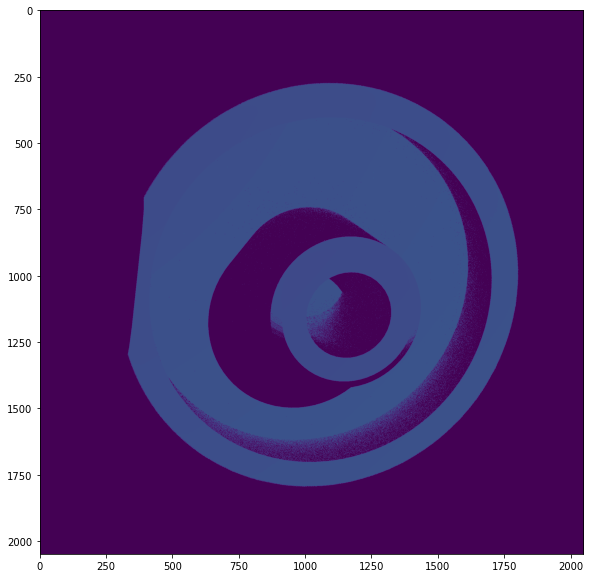

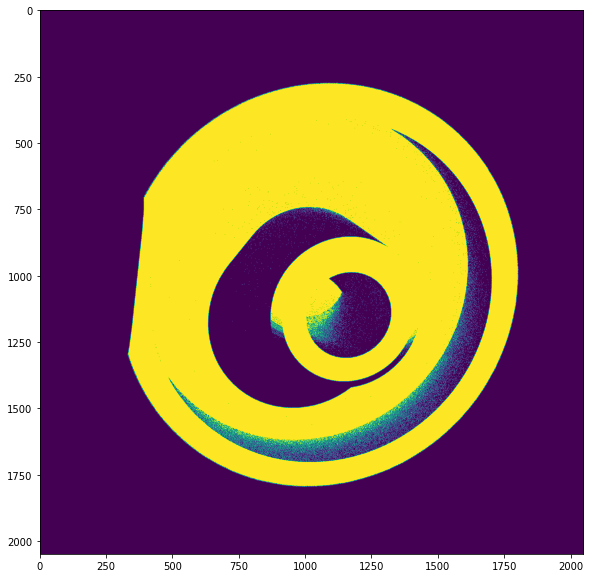

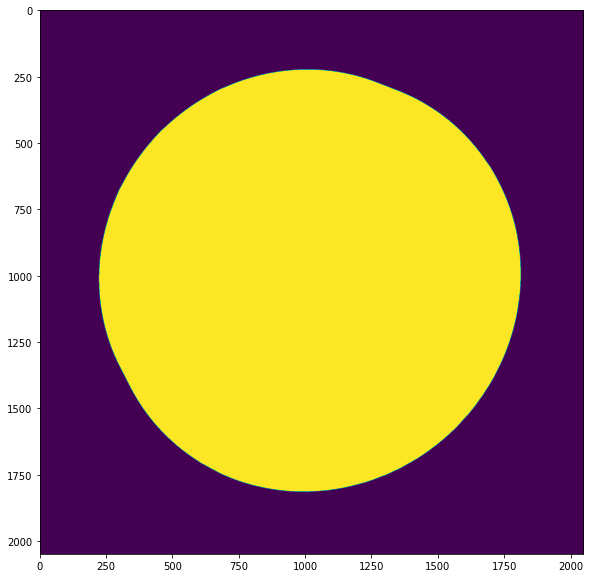

0.0014918447


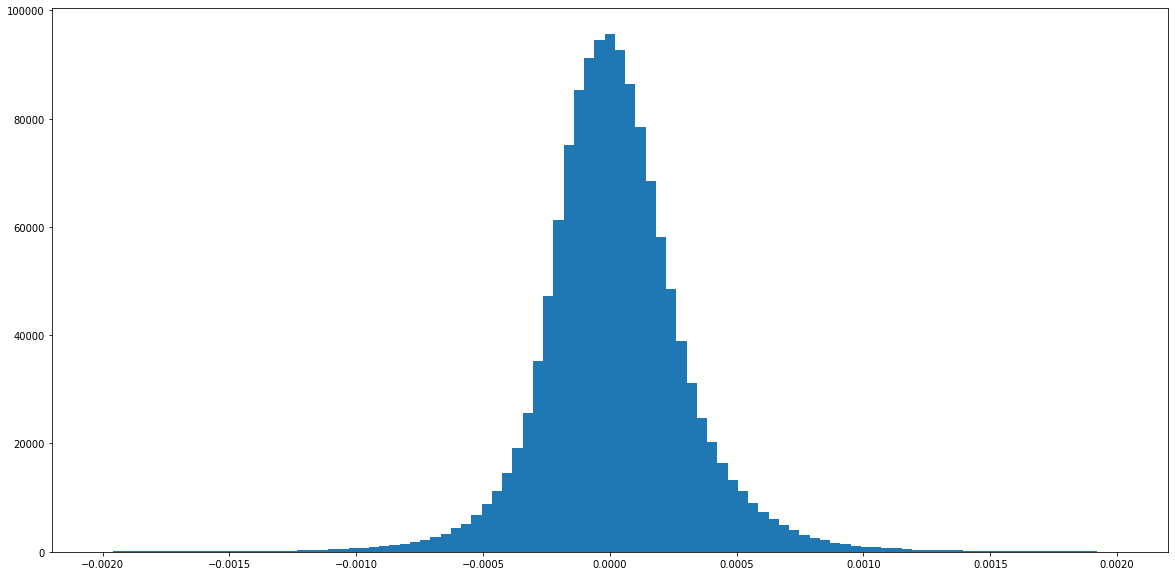

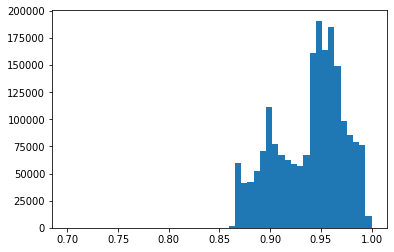

<Figure size 432x288 with 0 Axes>

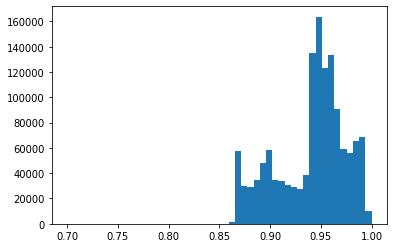

<Figure size 432x288 with 0 Axes>

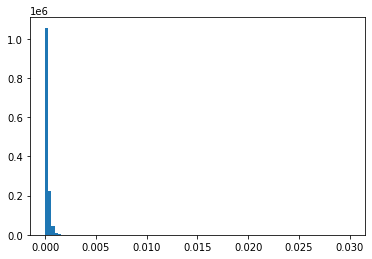

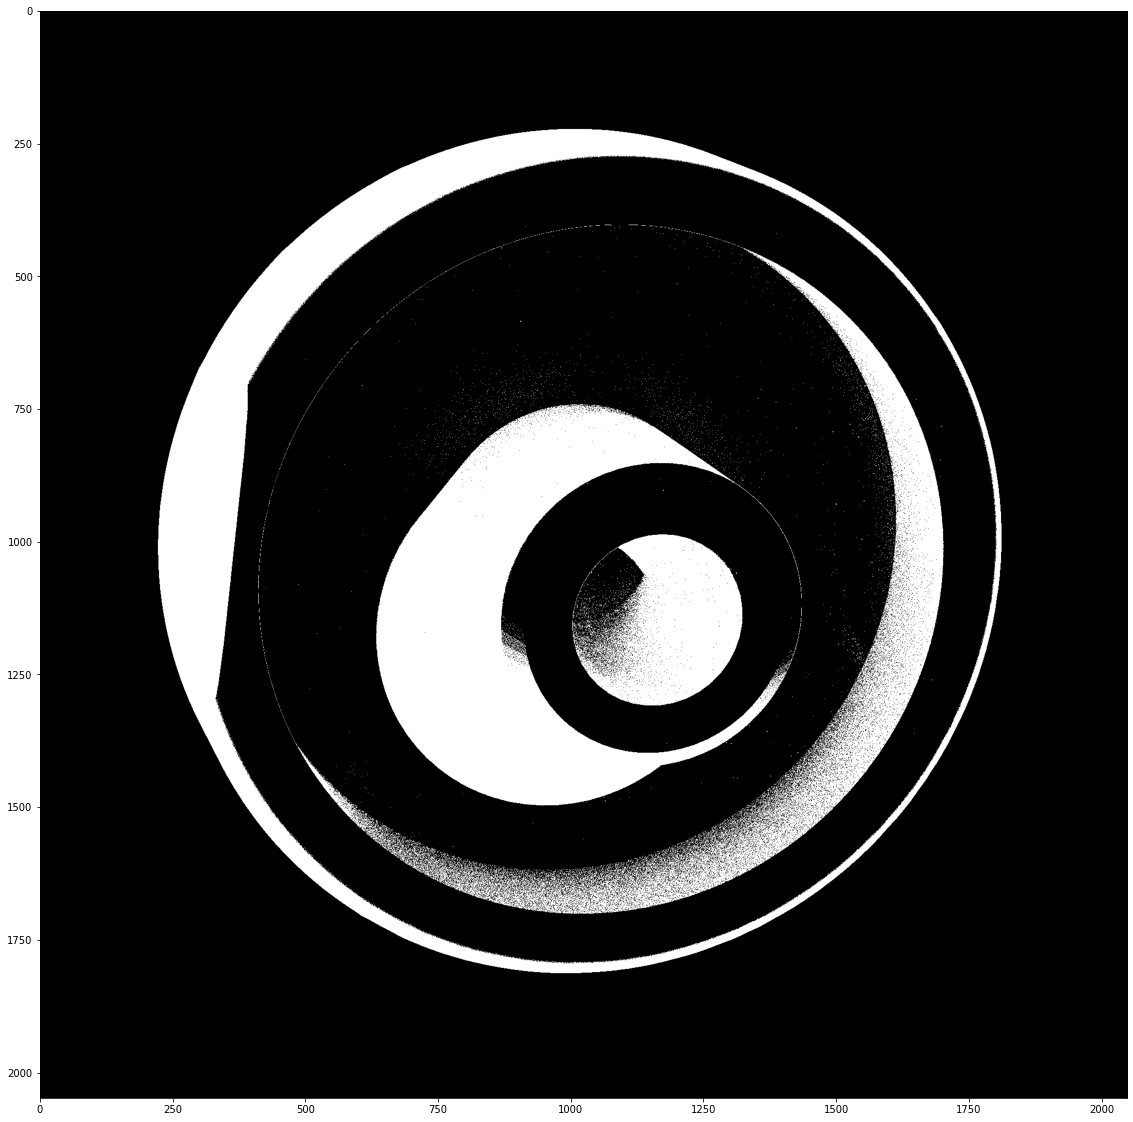

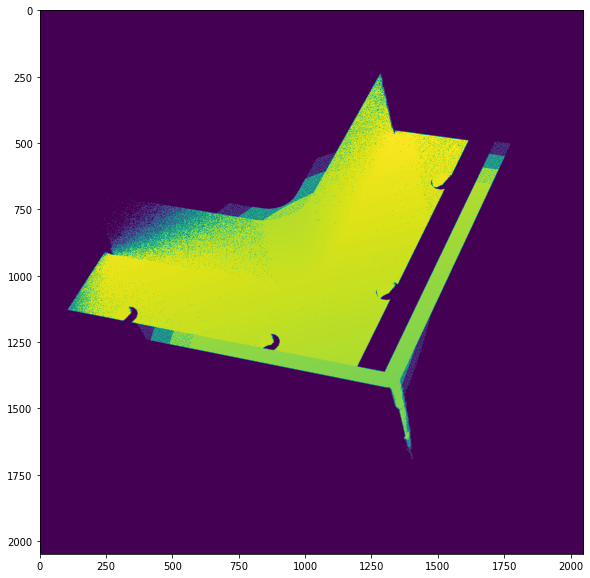

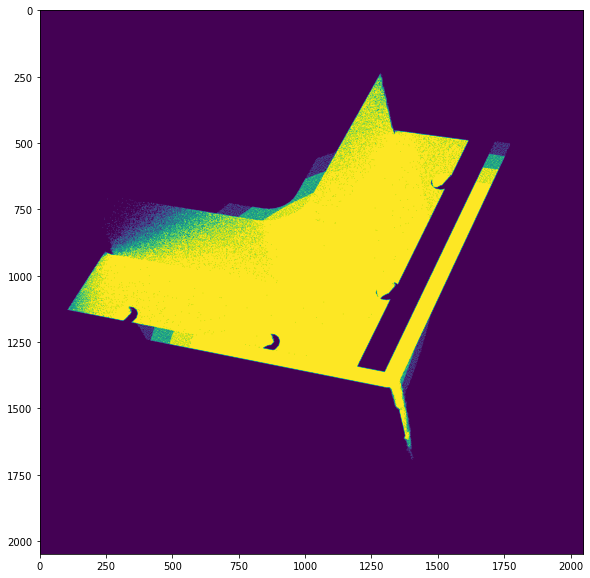

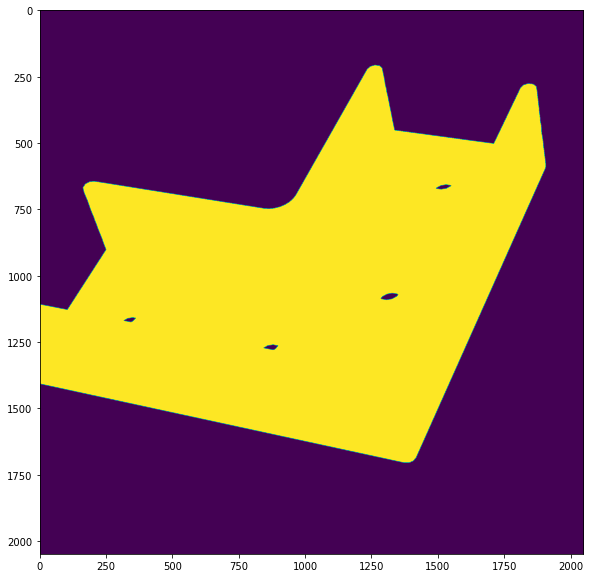

0.001526475


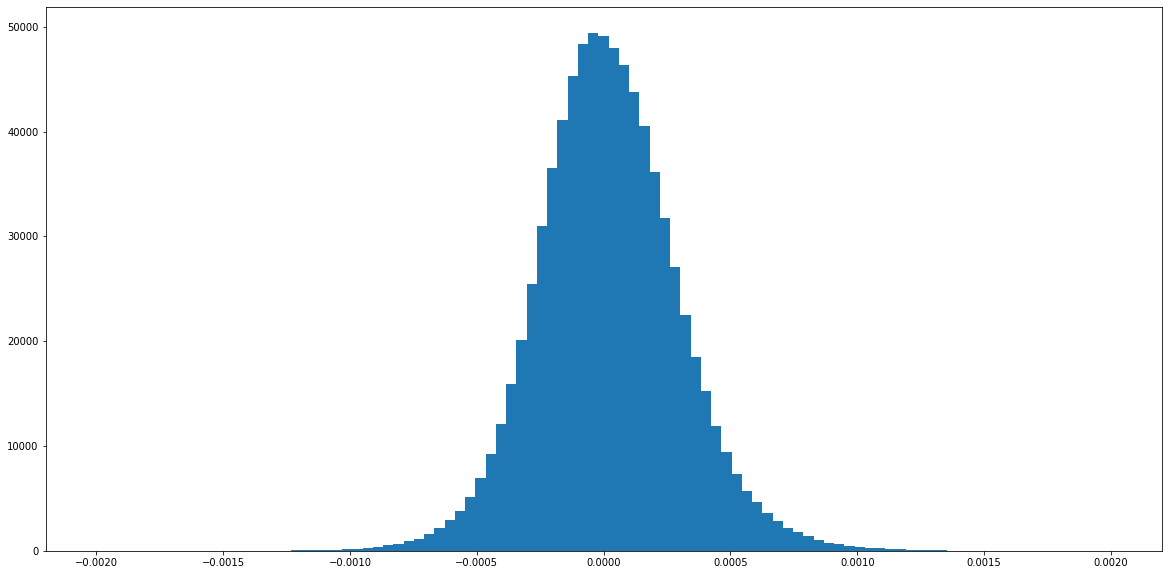

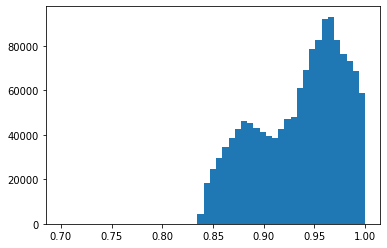

<Figure size 432x288 with 0 Axes>

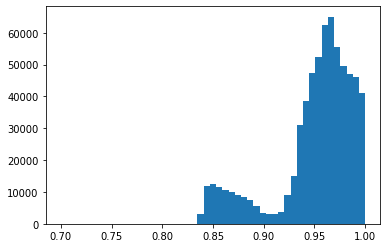

<Figure size 432x288 with 0 Axes>

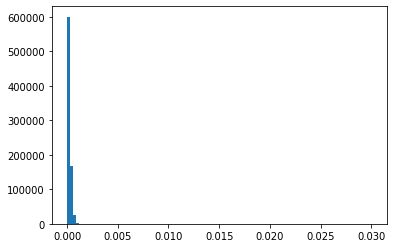

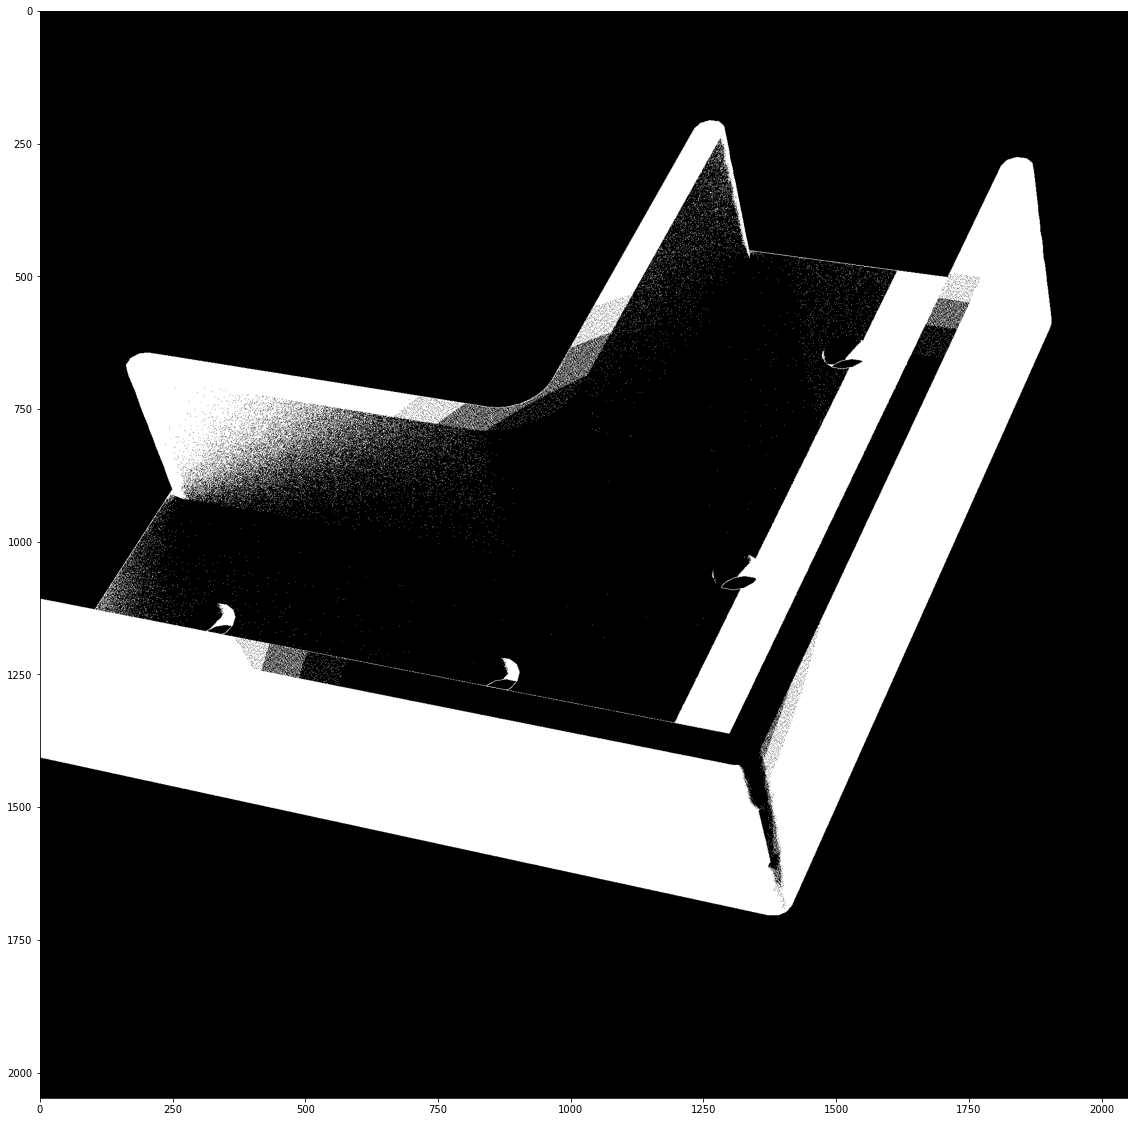

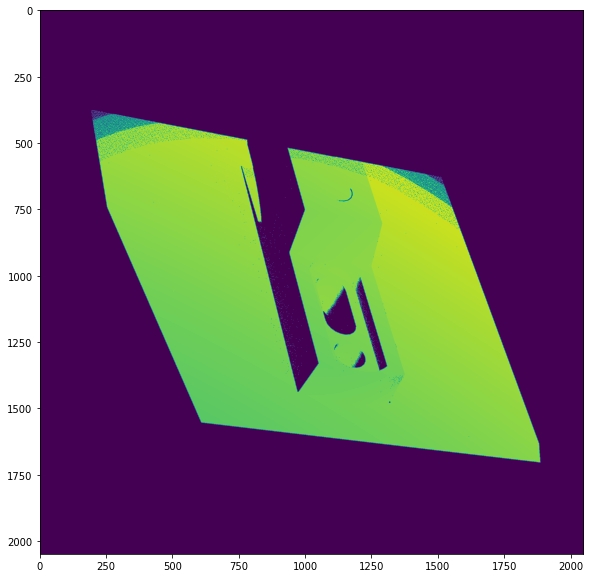

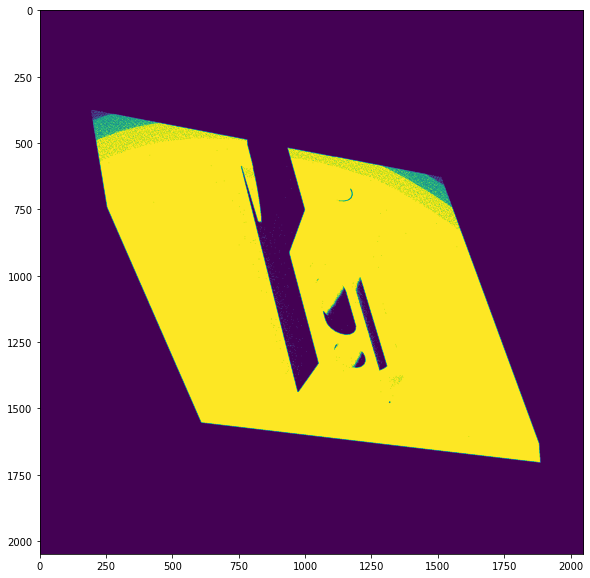

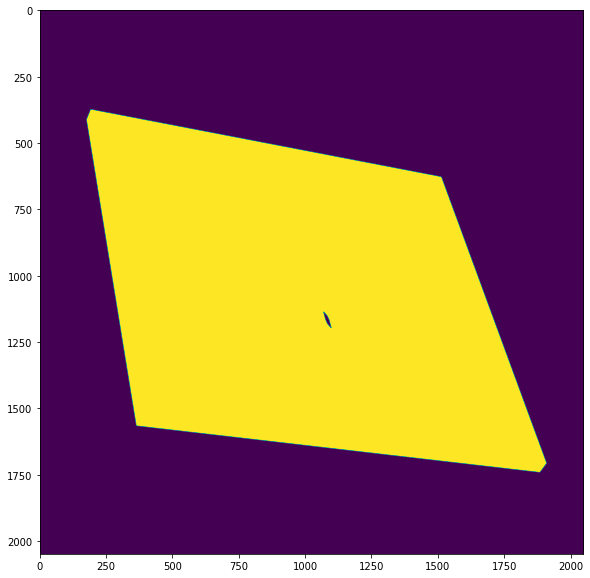

0.0014760494


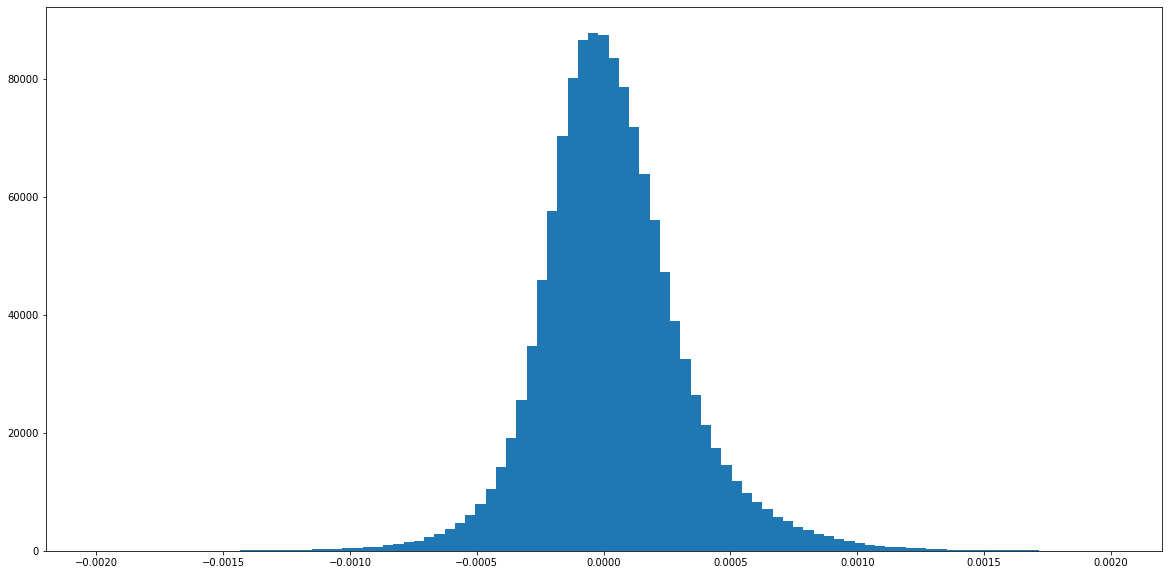

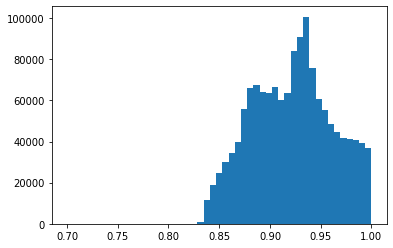

<Figure size 432x288 with 0 Axes>

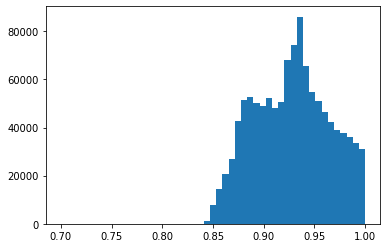

<Figure size 432x288 with 0 Axes>

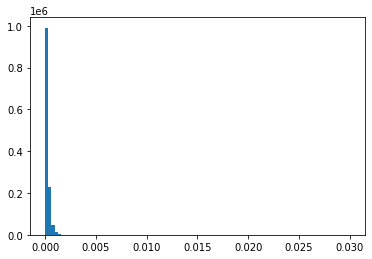

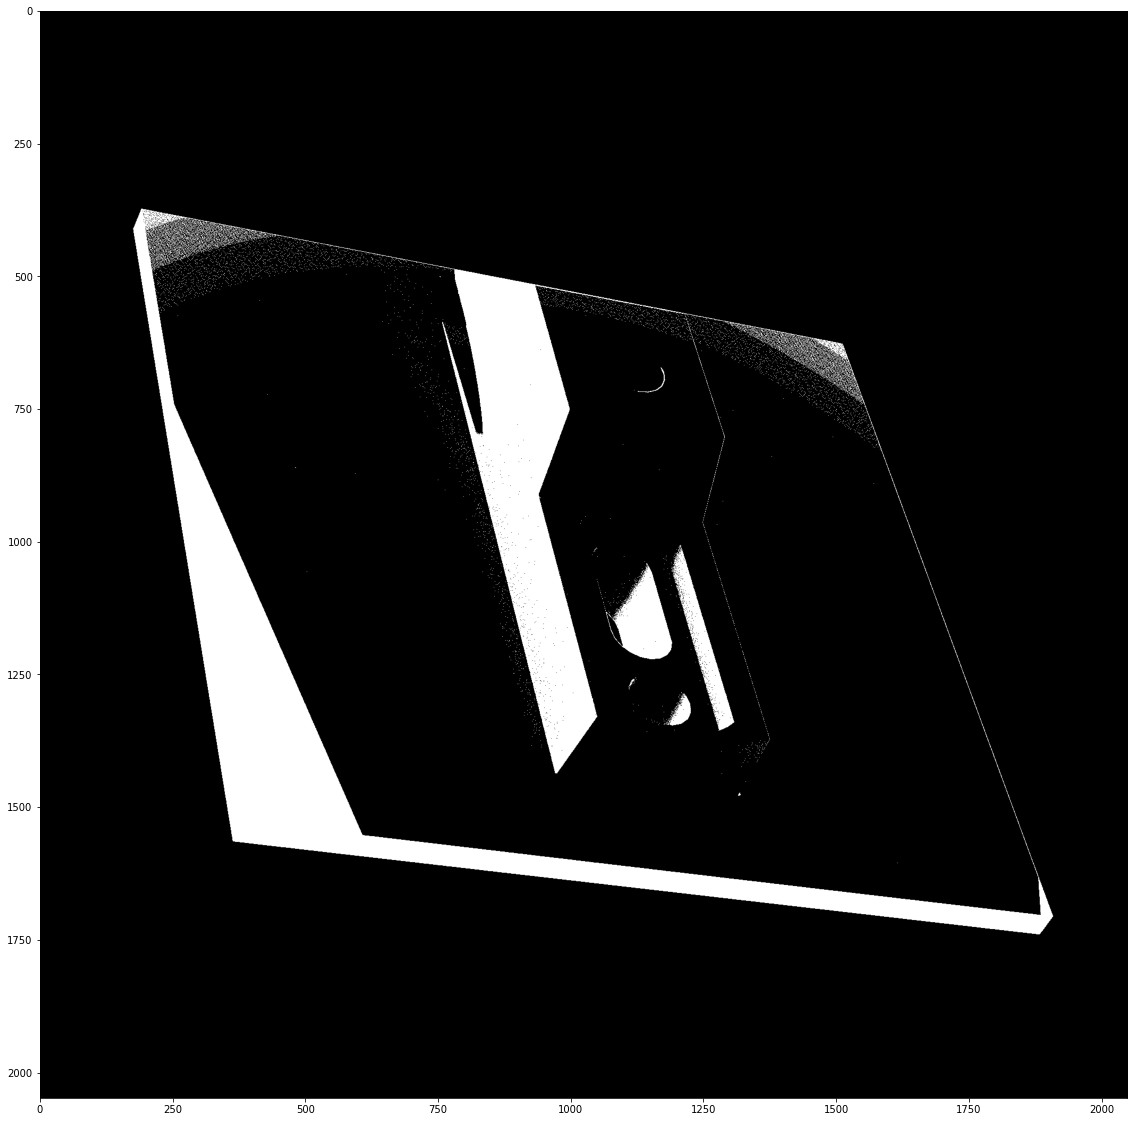

In [3]:
import OpenEXR, Imath
import numpy as np
import matplotlib.pyplot as plt
#for fide in range(0, 25):
for folder in obj_folders[:]:
    #folder = "obj_%02i"%fide
    nr = folder.split("_")[2]
    folder = folder.split("/")[2]
    #nr = folder.split("_")[1] + "_" + folder.split("_")[2]
    #print(folder, nr)
    #continue
    dmap = glob.glob("pdata/img/%s/*depth.txt"%folder)[0]
    #print(dmap)
    #continue

    with open(dmap, "r") as fi:
        lines = fi.readlines()

    width = 3232
    height = 2426
    width = 2048
    height = 2048

    dmap = np.zeros((height, width), dtype="float32")
    #print(len(lines))
    for i, l in enumerate(lines):
        el = l.strip().split("\t")
        for j, e in enumerate(el):
            dmap[i, j] = float(e) * 0.001

    med = np.median(dmap[dmap != 0.0])
#     print(med)
    #dmap[dmap > 2*med] = 0.0
    plt.figure(figsize = (10,10))
    plt.imshow(dmap)
    plt.show()
    mask = np.zeros_like(dmap)
    mask[dmap>0] = 1

    #plt.figure(figsize = (10,10))
    #plt.hist(mask.reshape(-1), np.linspace(-1, 1, 6))
    #plt.show()
    #print(np.min(dmap), np.max(dmap))

    def read_exr(exrfile):
        imagefile = OpenEXR.InputFile(exrfile)
        pt = Imath.PixelType(Imath.PixelType.FLOAT)
        header = imagefile.header()
        dw = header['dataWindow']
        channels = header['channels']
        size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1, len(channels))

        depth = imagefile.channel("distance.Y", pt)
            # red = np.array(Image.frombytes("F", size[:2], channel))
        #print(type(depth))
        im = np.frombuffer(depth, dtype=np.float32)
#         print(im.shape, size)
        im.shape = (size[1], size[0])
        im = im.reshape(size[1], size[0])
        return im

        rgbf = [Image.fromstring("F", size, file.channel(c, pt)) for c in "RGB"]

        extrema = [im.getextrema() for im in rgbf]
        darkest = min([lo for (lo,hi) in extrema])
        lighest = max([hi for (lo,hi) in extrema])
        scale = 255 / (lighest - darkest)
        def normalize_0_255(v):
            return (v * scale) + darkest
        rgb8 = [im.point(normalize_0_255).convert("L") for im in rgbf]
        Image.merge("RGB", rgb8).save(jpgfile)

    #im = read_exr("pdata/img/2048/cam_0512x0512_00.exr")
    #im = read_exr("pdata/img/2048_2048/cam_2048x2048_00.exr")
    #im = read_exr("pdata/img/%s/cam_1920x1080_00.exr"%folder)
    im = read_exr("pdata/img/%s/cam_2048x2048_00.exr"%folder)
    #im = res
    mask2 = np.zeros_like(dmap)
    mask2[im>0] = 1

#     print(im.shape, dmap.shape, mask.shape)
    #imm = im.copy()
    #imm[mask==0] = 0.0
    plt.figure(figsize = (10,10))
    plt.imshow(mask)
    plt.show()
    plt.figure(figsize = (10,10))
    plt.imshow(mask2)
    plt.show()
#     print(np.max(dmap[mask==1]), np.min(dmap[mask==1]), np.mean(dmap[mask==1]), np.max(im[mask==1]), np.min(im[mask==1]), np.mean(im[mask==1]))
    #print(im[80:120, 40:50])
    print(np.mean(im[mask==1]) - np.mean(dmap[mask==1]))
    dmap = dmap - np.mean(dmap[mask==1])
    dmap = dmap + np.mean(im[mask==1])
    dmap[mask == 0] = 0.0
    
    
    diff = im[mask==1] - dmap[mask==1]
    plt.figure(figsize = (20,10))
    plt.hist(diff.reshape(-1), np.linspace(-0.002, 0.002, 100))
    plt.show()
    
    if True:
        plt.figure()
        plt.hist((im[im>0]).reshape(-1), np.linspace(0.7, 1.0, 50))
        plt.figure()#figsize = (20,10))
        #plt.imshow(im)
        plt.show()
        plt.hist((dmap[dmap>0]).reshape(-1), np.linspace(0.7, 1.0, 50))
        plt.figure()#figsize = (20,10))
        #plt.imshow(dmap)
        plt.show()
        diff = np.abs(im-dmap)

        plt.hist(diff[diff>0].reshape(-1), np.linspace(0, 0.03, 100))
        plt.figure(figsize = (20,20))
        difft = diff
        difft[difft > 0.01] = 1.0
        plt.imshow(difft, cmap="gray")
        plt.show()
    # diff[diff>0.5] = 0.0
    # plt.hist(diff.reshape(-1), 50)
    # plt.figure(figsize = (20,10))
    # plt.imshow(np.abs(diff), cmap="gray")
    # plt.show()
    #print(np.mean(diff), np.std(diff))
    #print(im.dtype, dmap.dtype)
    with open("pdata/img/obj_hf/%s_depth_gt.npy"%(nr), "wb") as fi:
        np.save(fi, im)
    with open("pdata/img/obj_hf/%s_depth_rec.npy"%(nr), "wb") as fi:
        np.save(fi, dmap)

In [ ]:
%matplotlib notebook
plt.figure()#figsize = (20,20))
plt.imshow(diff[500:1000, 0:500], cmap="gray")
plt.show()
vmin = min(np.min(im[500:1000, 0:500]), np.min(dmap[500:1000, 0:500]))
vmax = max(np.max(dmap[500:1000, 0:500]), np.max(im[500:1000, 0:500]))
#print(im.shape, dmap.shape)

plt.figure(figsize = (10,10))
plt.imshow(im[500:1000, 0:500],cmap="gray", vmin=vmin, vmax=vmax)
plt.show()

plt.figure()#figsize = (20,20))
plt.imshow(dmap[500:1000, 0:500], vmin=vmin, vmax=vmax, cmap="gray")
plt.show()

In [ ]:
import sympy
from sympy.combinatorics.graycode import gray_to_bin

bw = np.array(images[0:2])
vertical = np.array(images[2:24:2])
horizontal = np.array(images[24::2])
print(len(bw), len(horizontal), len(vertical))

mean_val = (bw[0] - bw[1]) * 0.5#np.mean(bw[0][bw[0] != bw[1]]) * 0.5
plt.figure(figsize = (20,10))
plt.imshow(mean_val)#, cmap="gray")
plt.show()
print(mean_val)
#mask = bw[0]>mean_val
#mask1 = np.where(bw[0]>mean_val)
if False:
    for v in vertical[:1]:
        plt.figure(figsize = (20,10))
        plt.imshow(v, cmap="gray")
        plt.show()

def get_indices(images, mean_val):
    images = images.astype(np.int32)
    G = np.stack(images.copy()) > mean_val
            
    #print(G.shape)
    lines = np.zeros_like(images[0])

    for row in range(G.shape[1]):
        for col in range(G.shape[2]):
            gg = "".join(str(x) for x in (1 * G[:, row, col]).tolist())
            gb = gray_to_bin(gg)
            #if int(gb, 2) > 230:
            #    print(gg, gb, int(gb, 2))
            lines[row, col] = int(gb, 2) 

    plt.figure(figsize = (20,10))
    plt.imshow(lines)#, cmap="gray")
    plt.show()
    return lines

#h = get_indices(horizontal, 128)
v = get_indices(vertical, mean_val)
#th = get_indices(tex_h, 128)
#tv = get_indices(tex_v, 128)
#np.min(v), np.max(v), v[200], tv[0]

In [ ]:
with open("pdata/pattern_0.txt", "r") as fi:
    lines = fi.readlines()
    
map0 = np.zeros([2048]*2, np.int32)
print(len(lines))
for i, l in enumerate(lines):
    el = l.strip().split("\t")
    for j, e in enumerate(el):
        #print(e)
        if e == 'nan':
            map0[i, j] = 0
        else:
            map0[i, j] = int(e)

%matplotlib inline           
#plt.figure(figsize = (20,10))
print(np.sum((v-map0)>=50))
viz = (v-map0)
viz[viz>=50] = 0
plt.imshow(viz)
plt.show()
print((v-map0)[280:285, 280:285], np.min(viz), np.max(viz))
print(map0.dtype, map0.shape, np.mean(viz))

In [ ]:
print(h.shape, h.dtype)

In [ ]:
import yaml
thv = np.transpose(np.stack([th, tv, np.zeros_like(tv)]), (1, 2, 0)).astype("uint32")
hv = np.transpose(np.stack([h, v, np.zeros_like(v)]), (1, 2, 0)).astype("uint32")

#hv = np.swapaxes(np.stack([h, v, np.zeros_like(v)]), 1, 2)
#print(hv.dtype, thv.dtype)
plt.figure(figsize = (20,20))
plt.imshow(hv)
plt.show()

with open("pdata/calibration.yml") as fi:
    calib = yaml.load(fi)

In [ ]:
R = np.array(calib["R"]["data"]).reshape(3,3)
T = np.array(calib["T"]["data"]).reshape(1,3)
K_c = np.array(calib["cam_K"]["data"]).reshape(3,3)
K_p = np.array(calib["proj_K"]["data"]).reshape(3,3)
kc_c = np.array(calib["cam_kc"]["data"]).reshape(1,5)
kc_p = np.array(calib["proj_kc"]["data"]).reshape(1,5)
print(kc_p.shape)

In [ ]:
#print(len(horizontal), np.max(textures_h[0]))
#print(h[600:650, 600:650])
#plt.imshow(h)
#plt.show()
import cv2

print(np.min(thv), np.max(thv), np.min(hv), np.max(hv))
points1 = []
points2 = []
for r in range(hv.shape[0]):
    for c in range(hv.shape[1]):
        if hv[r, c, 0] > 0 or hv[r, c, 1] > 0:
            points1.append((r, c))
            points2.append((hv[r,c,0], hv[r,c,1]))
            #print(hv[r, c, :2])
points1 = np.array(points1).astype("float").reshape(1, -1, 2)
points2 = np.array(points2).astype("float").reshape(1, -1, 2)
#print(points1.shape, points2.dtype)
#print(points1)

#ret, cam_mtx, cam_dist, rvecs, tvecs = cam_calib
#origin, R, proj_mtx, proj_dist = proj_calib

outp1 = cv2.undistortPoints(points1, K_c, kc_c).reshape((-1, 2))
outp2 = cv2.undistortPoints(points2, K_p, kc_p).reshape((-1, 2))

u1 = np.concatenate([outp1, np.ones((outp1.shape[0], 1))], axis=1)
u2 = np.concatenate([outp2, np.ones((outp2.shape[0], 1))], axis=1)

#print(proj_3d)
w1 = u1
#np.dot(R.T,(u2-T).T).shape)
w2 = np.dot(R.T, (u2 - T).T).T
v1 = w1
v2 = np.dot(R.T, u2.T).T
print(u2, v2)

#proj_3d = np.matmul(R, proj_3d.T).T

#print(np.multiply(cam_3d, proj_3d).shape)

#v12 = np.sum(np.multiply(cam_3d, proj_3d), axis=1).reshape(-1, 1)

#print(v12, v12.shape)
#v1 = (np.linalg.norm(cam_3d, axis=1)**2).reshape(-1, 1)
#v2 = (np.linalg.norm(proj_3d, axis=1)**2).reshape(-1, 1)
#L1 = np.matmul(cam_3d, T) * v2
#print(L1.shape)
#L = (np.matmul(cam_3d, T) * v2 + np.matmul(proj_3d, -T) * v12) / (v1 * v2 - v12**2)

#pon = cam_3d * L[:]
#pon.shape

#cv.StereoRectify(cameraMatrix1, cameraMatrix2, distCoeffs1, distCoeffs2, imageSize, R, T, R1, R2, P1, P2, Q=None, flags=CV_CALIB_ZERO_DISPARITY, alpha=-1, newImageSize=(0, 0)) -> (roi1, roi2)
#pc = cv2.triangulatePoints(p1, p2, points1.T, points2.T) #3x4, 3x4, 2xn, 2xn

In [ ]:
import meshplot as mp
mp.plot(pon)

In [ ]:
with open("pdata/depth_2048_2048_256.txt", "r") as fi:
#with open("pdata/depth05.txt", "r") as fi:

    lines = fi.readlines()
    
#with open("pdata/depth_2048.txt", "r") as fi:
#    lines = fi.readlines()
    
dmap = np.zeros([2048]*2, dtype="float32")
print(len(lines))
for i, l in enumerate(lines):
    el = l.strip().split("\t")
    for j, e in enumerate(el):
        #print(e)
        dmap[i, j] = float(e) * 0.01

med = np.median(dmap[dmap != 0.0])
print(med)
#dmap[dmap > 2*med] = 0.0
plt.imshow(dmap)
plt.show()
np.max(dmap)

In [ ]:
import meshplot as mp
ai = np.random.randint(0, 20000, size=20000)
print(ai)
pe2 = pc1[ai, :3]*pc1[ai, 3][:, None]*100
print(np.min(pe2), np.max(pe2), pe2.shape)
mp.plot(pe2, shading={"point_size": 0.01})
#print(pc1[:1000, :3]/ pc1[:1000, 3][:, None])

In [ ]:
# Calibration
import cv2

import patterns as pa
import matplotlib.pyplot as plt

def get_checkerboard(rows, cols, n=64):
    segment_black = np.zeros(shape = [n,n])
    segment_white = np.ones(shape = [n,n])*255
    chessboard = np.hstack((segment_black,segment_white))
    for i in range(int(np.floor((cols-1)/2))):
        chessboard = np.hstack((chessboard, segment_black))
        chessboard = np.hstack((chessboard, segment_white))
    temp = chessboard
    for i in range(rows-1):
        chessboard = np.concatenate((np.fliplr(chessboard),temp))
    return chessboard

board = get_checkerboard(15, 15)
board[:64*3+48, :] = 0
board[-64*3-48:, :] = 0
board[:, :64*4+48] = 0
board[:, -64*2-48:] = 0

matplotlib.image.imsave('rdata/checker.png', board, cmap="gray", vmin=0, vmax=255)
sc = render_scene_with_texture('rdata/checker.png', 2)
sc = cv2.cvtColor(sc, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(sc, (8,6), None)

#objpoints.append(objp)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners2 = cv2.cornerSubPix(sc, corners, (11,11), (-1,-1), criteria)
#imgpoints.append(corners2)

img = cv2.drawChessboardCorners(sc, (8,6), corners2, ret)

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

c_ret, c_mtx, c_dist, c_rvecs, c_tvecs = cv2.calibrateCamera([objp], [corners2], sc.shape[::-1], None, None)
plt.figure(figsize = (10,10))
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
board = get_checkerboard(15, 15).astype("uint8")[:, :-64]
board[:64*3+48, :] = 0
board[-64*3-48:, :] = 0
board[:, :64*3+48] = 0
board[:, -64*1-48:] = 0
#sc = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY)
#print(board.shape)
plt.imshow(board)
plt.show()
ret, corners = cv2.findChessboardCorners(board, (8,6), None)
print(ret)

#objpoints.append(objp)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners2 = cv2.cornerSubPix(board, corners, (11,11), (-1,-1), criteria)
#imgpoints.append(corners2)

img = cv2.drawChessboardCorners(board, (8,6), corners2, ret)

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

p_ret, p_mtx, p_dist, p_rvecs, p_tvecs = cv2.calibrateCamera([objp], [corners2], board.shape[::-1], None, None)
plt.figure(figsize = (10,10))
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
#print(c_mtx, c_dist)
#print(p_mtx, p_dist)
zeros = np.zeros((3, 1))
#print(zeros)
p1 = np.hstack((c_mtx, zeros))
p2 = np.hstack((p_mtx, zeros))
p2[0, 3] = p2[0, 0] * 5.0
print(p1,"\n", p2)
#cv2.triangulatePoints(p1, p2)

In [ ]:
sensor=scene.getSensor()
sensor.setShutterOpen(0)
sensor.setShutterOpenTime(1)

stepSize=5
for i in range(0,360/stepSize):
    rotationCur=Transform.rotate(Vector(0,0,1),i*stepSize)
    rotationNext=Transform.rotate(Vector(0,0,1),(i+1)*stepSize)
    trafoCur=Transform.lookAt(rotationCur*Point(0,-6,4),Point(0,0,.5),rotationCur*Vector(0,1,0))
    trafoNext=Transform.lookAt(rotationNext*Point(0,-6,4),Point(0,0,.5),rotationNext*Vector(0,1,0))
    atrafo=AnimatedTransform()
    atrafo.appendTransform(0,trafoCur)
    atrafo.appendTransform(1,trafoNext)
    atrafo.sortAndSimplify()
    sensor.setWorldTransform(atrafo)
    scene.setDestinationFile('frame_%03i.png'%i)
    job=RenderJob('job_%i'%i,scene,queue)
    job.start()
    queue.waitLeft(0)
    queue.join()

In [ ]:
array=np.array(bitmap.getNativeBuffer())

In [ ]:
dir(scene)

In [ ]:
a = np.array([[9, 5, 7, 8], [8,5,8,1],[9,7,4,7], [7,6,2,6]])
print(np.linalg.svd(a))

In [ ]:
def create_checkerboard_ply(fname="cb", shape=[10, 8], size=20, color1=[64, 64, 64], color2=[255, 255, 255]):
    header = "ply\nformat ascii 1.0\nelement vertex %i\nproperty float x\nproperty float y\nproperty float z\nproperty float nx\nproperty float ny\nproperty float nz\nproperty uchar red\nproperty uchar green\nproperty uchar blue\nelement face %i\nproperty list uchar uint vertex_indices\nend_header\n"
    faces = []
    vertices = []
    x2 = shape[0] / 2 * size
    z2 = shape[1] / 2 * size
    vc = 0
    for r in range(shape[1]):
        for c in range(shape[0]):
            if r%2 == 0 and c%2 == 0 or (r+1)%2 == 0 and (c+1)%2 == 0:
                col = color1
            else:
                col = color2
            v0 = ((c * size) - x2, 0.0, (r * size) - z2)
            v1 = (((c+1) * size) - x2, 0.0, (r * size) - z2)
            v2 = ((c * size) - x2, 0.0, ((r+1) * size) - z2)
            v3 = (((c+1) * size) - x2, 0.0, ((r+1) * size) - z2)
            vertices.append("%0.6f %0.6f %0.6f 0.0 -1.0 0.0 %i %i %i"%(v0[0], v0[1], v0[2], col[0], col[1], col[2]))
            vertices.append("%0.6f %0.6f %0.6f 0.0 -1.0 0.0 %i %i %i"%(v1[0], v1[1], v1[2], col[0], col[1], col[2]))
            vertices.append("%0.6f %0.6f %0.6f 0.0 -1.0 0.0 %i %i %i"%(v2[0], v2[1], v2[2], col[0], col[1], col[2]))
            vertices.append("%0.6f %0.6f %0.6f 0.0 -1.0 0.0 %i %i %i"%(v3[0], v3[1], v3[2], col[0], col[1], col[2]))

            faces.append("4 %i %i %i %i"%(vc, vc+1, vc+3, vc+2))
            vc += 4

    with open(fname+"%i_%i.ply"%(shape[0], shape[1]), "w") as fi:
        fi.write(header%(len(vertices), len(faces)))
        for v in vertices:
            fi.write(v+"\n")
        for f in faces:
            fi.write(f+"\n")
    print("Created checkerboard")
    
create_checkerboard_ply()

In [ ]:

board = get_checkerboard(11, 20)
print(board.shape, np.min(board), np.max(board))
#board = 255 - board
board[32:64, :] = 255
board[-64:-32, :] = 255
board[:, 32:64] = 255
board[:, -64:-32] = 255
board[:32, :] = 0
board[-32:, :] = 0
board[:, :32] = 0
board[:, -32:] = 0

In [ ]:
import igl